In [1]:
from google.colab import files

uploaded= files.upload()

Saving mushroom.csv to mushroom (1).csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Task 1: Exploratory Data Analysis (EDA)**

In [3]:
# Loading the dataset and checking the size of the dataset

df= pd.read_csv("mushroom.csv")
df.shape

(2000, 26)

In [4]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [5]:
# Dropping the unnamed column as it is not relevant to our analysis

df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [6]:
# Checking for null values

df.isnull().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [7]:
# Checking for null values and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

In [8]:
# Column names

df.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [9]:
# Checking if the target variable is balanced or not

df["class"].value_counts()

class
poisonous    1400
edible        600
Name: count, dtype: int64

In [10]:
# Checking for duplicates

df[df.duplicated].shape

(1024, 25)

In [11]:
# Duplicate rows are not exactly same so removing them is not the best option

df[df.duplicated]

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
34,bell,smooth,pink,no,foul,notched,distant,broad,pink,enlarging,...,universal,brown,one,zone,black,scattered,leaves,poisonous,5.291009,5.436304
70,sunken,scaly,yellow,no,pungent,descending,distant,narrow,orange,enlarging,...,partial,white,none,zone,white,numerous,leaves,poisonous,4.746453,10.769935
76,conical,grooves,brown,no,foul,free,distant,broad,white,tapering,...,partial,yellow,two,large,chocolate,solitary,woods,poisonous,12.206952,5.061715
109,sunken,smooth,white,no,anise,attached,crowded,broad,black,tapering,...,partial,brown,two,sheathing,black,solitary,woods,edible,13.214007,14.549171
127,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,flat,grooves,green,yes,musty,notched,crowded,broad,chocolate,enlarging,...,universal,yellow,one,zone,brown,abundant,meadows,poisonous,14.834383,2.053744
1994,flat,scaly,pink,no,spicy,attached,distant,narrow,red,enlarging,...,universal,brown,two,zone,brown,abundant,meadows,poisonous,4.794826,4.576464
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020


# Task **2**: Data Visualization

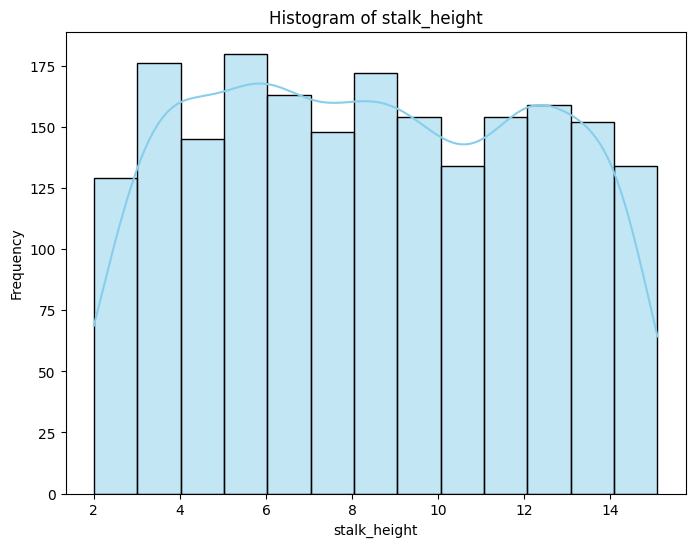

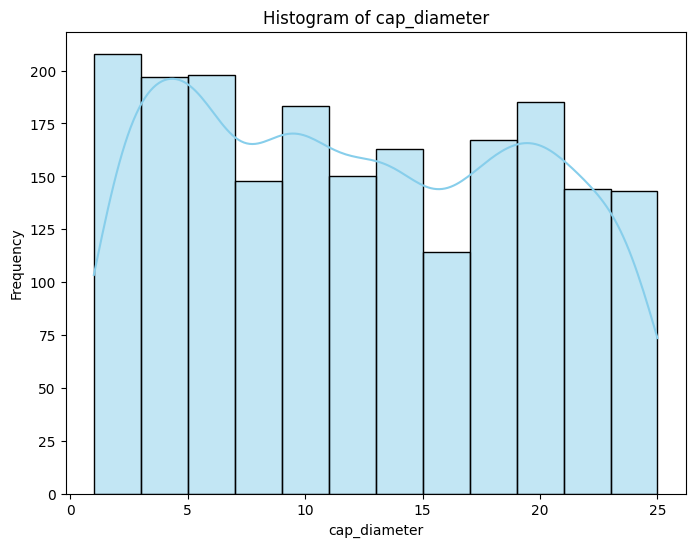

In [12]:
# Histogram

for i in df.columns:
  if df[i].dtype== "float64":
    plt.figure(figsize=(8,6))
    sns.histplot(df[i], color= 'skyblue', kde=True)
    plt.title(f"Histogram of {i}")
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.show()

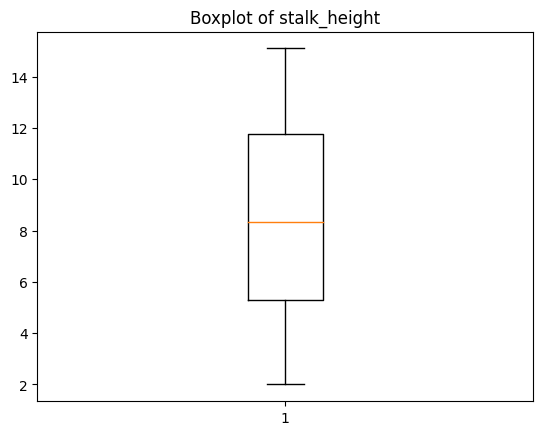

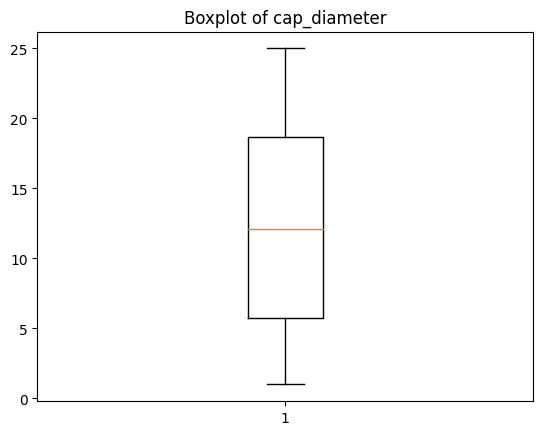

In [13]:
# Boxplot

for i in df.columns:
  if df[i].dtype== "float64":
    plt.boxplot(df[i])
    plt.title(f"Boxplot of {i}")
    plt.show()

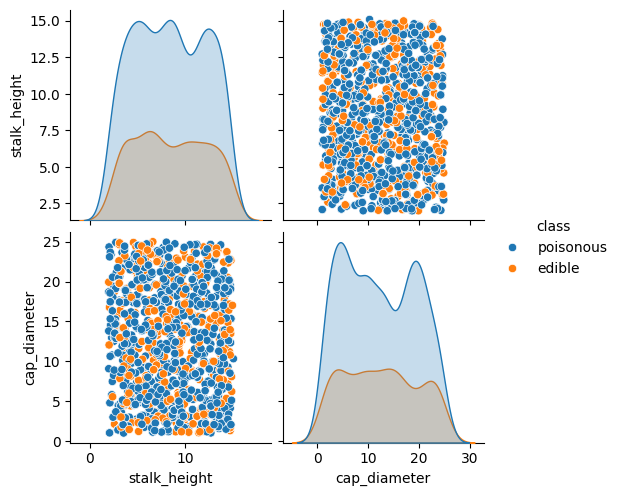

In [14]:
# Pairwise relationships between numerical attributes using pair plots.

sns.pairplot(data=df, hue="class")

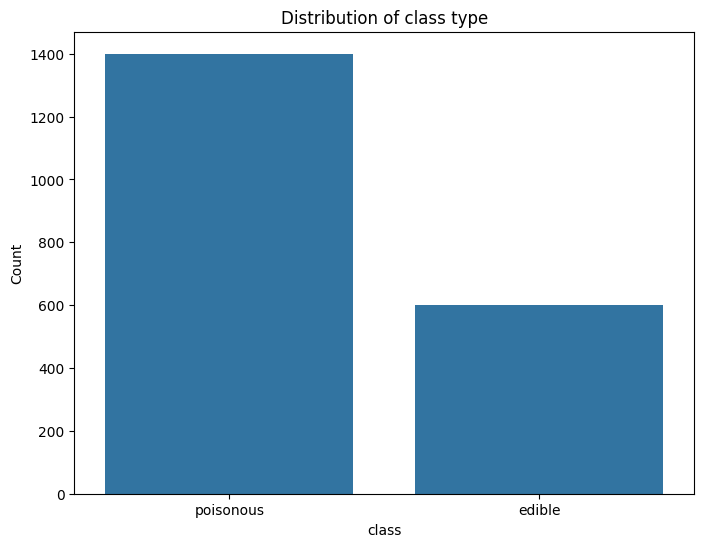

In [15]:
# Visulizing the target variable to ensure if the data is balanced

plt.figure(figsize=(8,6))
sns.countplot(data=df, x="class")
plt.title("Distribution of class type")
plt.xlabel("class")
plt.ylabel("Count")
plt.show()

# Task **3**: Data Preprocessing

In [25]:
# X and Y variables

y= df["class"]

x=df.drop("class", axis= 1)

In [26]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

LE= LabelEncoder()

for i in df.columns:
  if df[i].dtype== "object":
    df[i]= LE.fit_transform(df[i])
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245


In [27]:
# # Balancing the data

from imblearn.over_sampling import SMOTE

smote= SMOTE(random_state= 42)

x_resample, y_resample= smote.fit_resample(x,y)

In [28]:
# Data is balanced

y_resample.value_counts()

class
1    1400
0    1400
Name: count, dtype: int64

In [29]:
# Standardization of continuous variables

from sklearn.preprocessing import StandardScaler

ss= StandardScaler()

for i in df.columns:
  if df[i].dtype=="float64":
    feature_reshaped = df[i].values.reshape(-1, 1)
    df[i] = ss.fit_transform(feature_reshaped)

In [30]:
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,1.576459,-1.030123
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,-1.216463,0.958407
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,0.163717,-0.724904
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,-0.871852,1.222967
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,1.511897,0.032765


In [31]:
# Data partition

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x_resample, y_resample, test_size= 0.30)

# Task 4: SVM **Implementation**

In [32]:
# SVC Model fitting with cross-validation

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
svc= SVC(C=13, kernel= "poly",degree=6, probability=True)

training_score=[]
testing_score=[]

for i in range(1,101):
  x_train,x_test,y_train,y_test= train_test_split(x_resample,y_resample,test_size= 0.30,random_state=i)
  svc.fit(x_train, y_train)
  y_pred_train=svc.predict(x_train)
  y_pred_test=svc.predict(x_test)
  training_score.append(accuracy_score(y_train, y_pred_train))
  testing_score.append(accuracy_score(y_test, y_pred_test))
print("Accuracy score of train:", np.mean(training_score).round(2))
print("Accuracy score of test:", np.mean(testing_score).round(2))

Accuracy score of train: 1.0
Accuracy score of test: 0.89


In [33]:
# Metrics

accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1= f1_score(y_test, y_pred_test)
print("Accuracy of test:",accuracy.round(2))
print("Precision of test:",precision.round(2))
print("Recall of test:",recall.round(2))
print("F1 of test:",f1.round(2))

Accuracy of test: 0.88
Precision of test: 0.88
Recall of test: 0.88
F1 of test: 0.88


# Task 5: Visualization of SVM **Results**

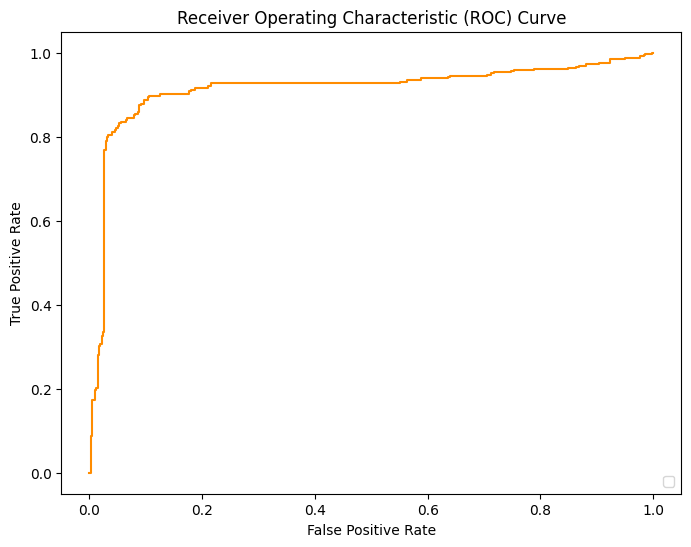

Area under the ROC curve (ROC AUC): 0.91


In [34]:
# ROC-AUC curve

from sklearn.metrics import roc_curve, auc

y_prob = svc.predict_proba(x_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print("Area under the ROC curve (ROC AUC):", roc_auc.round(2))

# Task 6: Parameter Tuning and **Optimization**

In [35]:
# GridsearchCV for hyperparamter tunning for LightGBM

from sklearn.model_selection import GridSearchCV

param_grid= {"C": [12,13],
             "kernel": ["linear", "poly","rbf"],
             "degree": [6,7,8]}

grid_search= GridSearchCV(svc, param_grid, cv=5)

grid_search.fit(x_train,y_train)

best_params= grid_search.best_params_

print("Best parameters:",best_params)

y_pred_train= grid_search.predict(x_train)
y_pred_test= grid_search.predict(x_test)

training_score= accuracy_score(y_train, y_pred_train)
testing_score= accuracy_score(y_test, y_pred_test)

print("Accuracy score of train:",training_score.round(2))
print("Accuracy score of test:",testing_score.round(2))

Best parameters: {'C': 13, 'degree': 6, 'kernel': 'poly'}
Accuracy score of train: 0.99
Accuracy score of test: 0.88


# Task 7: Comparison and **Analysis**

In [43]:
kernels = ['linear', 'poly', 'rbf']
degrees = [6]
C_values = [13]

for kernel in kernels:
    if kernel == 'poly':
        for degree in degrees:
            for C in C_values:
                svc = SVC(kernel=kernel, degree=degree, C=C)
                svc.fit(x_train, y_train)
                y_pred_test = svc.predict(x_test)
                testing_score = accuracy_score(y_test, y_pred_test)
                print(f'Accuracy of SVM with {kernel} kernel, degree={degree}, C={C}: {testing_score.round(2)}')
    else:
        for C in C_values:
            svc = SVC(kernel=kernel, C=C)
            svc.fit(x_train, y_train)
            y_pred_test = svc.predict(x_test)
            testing_score = accuracy_score(y_test, y_pred_test)
            print(f'Accuracy of SVM with {kernel} kernel, C={C}: {testing_score.round(2)}')

Accuracy of SVM with linear kernel, C=13: 0.64
Accuracy of SVM with poly kernel, degree=6, C=13: 0.88
Accuracy of SVM with rbf kernel, C=13: 0.82


In [44]:
# Therefore, SVC with polynomial kernel is giving better results.

# **SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.**
>> Strengths: SVMs can handle high-dimensional data efficiently, making them suitable for datasets with many features like the Mushroom dataset.

We can see that there is non-linear relationships between features. However, SVMs kernels like polynomial and RBF can capture complex non-linear relationships.

>> Weakness: The target variable in the mushroom dataset is imabalanced and SVMs struggle with imbalanced datasets.

SVMs performance can be sensitive to the choice of kernel and its parameters (e.g., C, gamma for RBF kernel), which requires careful tuning. In the case of the Mushroom dataset, selecting the appropriate kernel and tuning its parameters may be challenging.

# **Discuss practical implications of SVM in real-world classification tasks.**

1. Medical Diagnosis: SVMs can be used for disease diagnosis based on patient data, such as symptoms and medical history.
2. Image Classification: SVMs are widely used in image recognition tasks, such as facial recognition or object detection.
3. Text Classification: SVMs can classify text documents into categories, making them useful in sentiment analysis or spam detection.
4. Finance: SVMs can help in fraud detection, credit scoring, and stock market prediction based on financial data.
5. Biometrics: SVMs can be used for biometric identification, such as fingerprint recognition or voice authentication.